## Question: If corpus A & B are shuffled together into C, how are their growth curves related?

A quick thought experiment will do here: Obviously $M_C = M_A + M_B$, that is straightforward enough. But $N_C = |A ∪ B| = |A| + |B| - |A ∩ B| = N_A + N_B - x$. What exactly is $x$? How many words do the corpi share in common? Are they disjoint (i.e. $x = 0$)? Are they _the same corpus_ (i.e. $x = N_A = N_B$)? Clearly, there are hidden factors buried in the properties of the corpi themselves.

- As a first pass, is there _any_ way to estimate $N_C = f(M_A, N_A, M_B, N_B)$ with no extra information?
- What features of A & B are necessary to improve (or perfect) this relation?
- How does multi-channel mixing impact the performance of the logarithmic model? (cross-author, cross-subject, cross-language, etc)

In [1]:
# bloody dependencies
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 8)
from nltk.corpus import gutenberg
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error as MSE

# custom classes
from legomena import Corpus, SPGC

In [2]:
# standard project gutenberg corpus
spgc = SPGC.getMeta()

# for now, restrict study to english-only
spgc = spgc[spgc.language == "['en']"]

# preview
spgc.head()

,title,author,authoryearofbirth,authoryearofdeath,language,downloads,subjects,type
id,,,,,,,,
1,The Declaration of Independence of the United ...,"Jefferson, Thomas",1743.0,1826.0,['en'],604.0,"{'United States -- History -- Revolution, 1775...",Text
2,The United States Bill of Rights: The Ten Orig...,United States,NaN,NaN,['en'],158.0,"{'Civil rights -- United States -- Sources', '...",Text
3,John F. Kennedy's Inaugural Address,"Kennedy, John F. (John Fitzgerald)",1917.0,1963.0,['en'],28.0,{'Presidents -- United States -- Inaugural add...,Text
4,Lincoln's Gettysburg Address: Given November 1...,"Lincoln, Abraham",1809.0,1865.0,['en'],55.0,{'Consecration of cemeteries -- Pennsylvania -...,Text
5,The United States Constitution,United States,NaN,NaN,['en'],226.0,"{'United States. Constitution', 'United States...",Text


In [3]:
# all melville's work
melville = spgc[spgc.author == "Melville, Herman"]
melville.sort_values("downloads").tail()

,title,author,authoryearofbirth,authoryearofdeath,language,downloads,subjects,type
id,,,,,,,,
2489,"Moby Dick; Or, The Whale","Melville, Herman",1819.0,1891.0,['en'],324.0,"{'Mentally ill -- Fiction', 'Whaling ships -- ...",Text
21816,The Confidence-Man: His Masquerade,"Melville, Herman",1819.0,1891.0,['en'],518.0,"{'Satire', 'Swindlers and swindling -- Fiction...",Text
11231,"Bartleby, the Scrivener: A Story of Wall-Street","Melville, Herman",1819.0,1891.0,['en'],740.0,"{'Young men -- Fiction', 'Copyists -- Fiction'...",Text
15,Moby Dick,"Melville, Herman",1819.0,1891.0,['en'],905.0,"{'Mentally ill -- Fiction', 'Whaling ships -- ...",Text
2701,"Moby Dick; Or, The Whale","Melville, Herman",1819.0,1891.0,['en'],14337.0,"{'Whaling ships -- Fiction', 'Mentally ill -- ...",Text


In [4]:
# moby dick
mobydick = SPGC.get(2701)

Number of tokens (<corpus>.M): 210258
Number of types  (<corpus>.N): 16402
Legomena vector  (<corpus>.k): [   0 7197 2781 1555  872  632  439  338  303]
Frequency distribution accessible as <corpus>.fdist


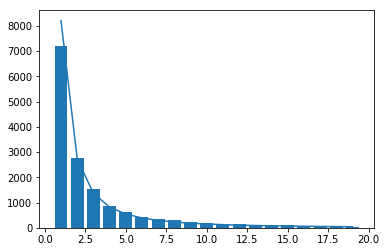

In [5]:
# k-legomena distributions
x = np.arange(1, 20)
plt.bar(x, mobydick.k[x])
plt.plot(x, mobydick.N/x/(x+1))
plt.show()

In [6]:
# load all melville into memory
corpi = {}
for pgid in melville.index.values:
    corpus = SPGC.get(pgid)
    if corpus is None:
        continue
    corpus.buildTTRCurve() # empirical TTR: 100 samples
    corpus.fit(optimize = True) # best fit logarithmic model: M_z,N_z
    corpi[pgid] = corpus

Number of tokens (<corpus>.M): 1352
Number of types  (<corpus>.N): 595
Legomena vector  (<corpus>.k): [  0 448  66  24  14  10   8   5   3]
Frequency distribution accessible as <corpus>.fdist
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z


/home/victor/Documents/GitHub/legomena/src/legomena.py:450: RuntimeWarning: invalid value encountered in log
  func = lambda x : 1./np.log(x) + 1./(1.-x) - h_obs
/home/victor/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Number of tokens (<corpus>.M): 113161
Number of types  (<corpus>.N): 10382
Legomena vector  (<corpus>.k): [   0 4518 1709  914  633  460  278  235  170]
Frequency distribution accessible as <corpus>.fdist
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 210370
Number of types  (<corpus>.N): 16570
Legomena vector  (<corpus>.k): [   0 7278 2796 1591  875  643  447  331  306]
Frequency distribution accessible as <corpus>.fdist
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 11276
Number of types  (<corpus>.N): 2606
Legomena vector  (<corpus>.k): [   0 1686  377  171   68   54   36   26   13]
Frequency distribution accessible as <corpus>.fdist
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 210258
Number of types  (<corpus>.N): 16402
Legomena vector  (<corpus>.

In [7]:
# tabulate (M,N,k1) for all of melville
df = [ (pgid, corpus.M, corpus.N, corpus.M_z, corpus.N_z, corpus.k[1]) for pgid, corpus in corpi.items() ]
df = pd.DataFrame(df, columns = ["id", "tokens", "types", "M_z", "N_z", "hapaxes"])
df = df.set_index("id")
df

,tokens,types,M_z,N_z,hapaxes
id,,,,,
15,1352,595,51428,6047,448
1900,113161,10382,56979,7523,4518
2489,210370,16570,114875,12461,7278
2694,11276,2606,61074,6792,1686
2701,210258,16402,113947,12286,7197
4045,101290,10415,77361,9159,4767
8118,117072,10973,96159,9982,5152
10712,135918,12873,97578,10990,5856
11231,14293,2923,53282,6053,1782


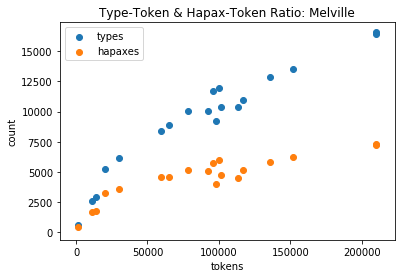

In [8]:
# draw a pretty picture
plt.scatter(df.tokens, df.types, label = "types")
plt.scatter(df.tokens, df.hapaxes, label = "hapaxes")
plt.title("Type-Token & Hapax-Token Ratio: Melville")
plt.xlabel("tokens")
plt.ylabel("count")
plt.legend()
plt.show()

In [9]:

pgids = ["4045", "1900", "8118", "2701"]
L = len(pgids)
N_mat = np.zeros((L, L))
for i,A in enumerate(pgids):
    for j,B in enumerate(pgids):
        corpusA = corpi[A]
        corpusB = corpi[B]
        tokensC = corpusA.tokens + corpusB.tokens
        corpusC = Corpus(tokensC)
        N_mat[i][j] = corpusC.N
        
N_mat

Number of tokens (<corpus>.M): 202580
Number of types  (<corpus>.N): 10415
Legomena vector  (<corpus>.k): [   0    0 4767    0 1928    0  946    0  511]
Frequency distribution accessible as <corpus>.fdist
Number of tokens (<corpus>.M): 214451
Number of types  (<corpus>.N): 14657
Legomena vector  (<corpus>.k): [   0 5702 2463 1340  855  658  496  366  266]
Frequency distribution accessible as <corpus>.fdist
Number of tokens (<corpus>.M): 218362
Number of types  (<corpus>.N): 15428
Legomena vector  (<corpus>.k): [   0 6358 2623 1439  980  659  421  350  305]
Frequency distribution accessible as <corpus>.fdist
Number of tokens (<corpus>.M): 311548
Number of types  (<corpus>.N): 19825
Legomena vector  (<corpus>.k): [   0 7947 3366 1788 1180  803  620  473  373]
Frequency distribution accessible as <corpus>.fdist
Number of tokens (<corpus>.M): 214451
Number of types  (<corpus>.N): 14657
Legomena vector  (<corpus>.k): [   0 5702 2463 1340  855  658  496  366  266]
Frequency distribution acce

array([[10415., 14657., 15428., 19825.],
       [14657., 10382., 15658., 19704.],
       [15428., 15658., 10973., 20003.],
       [19825., 19704., 20003., 16402.]])

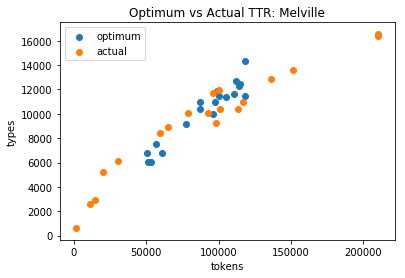

In [10]:
# optimum vs actual
plt.scatter(df.M_z, df.N_z, label = "optimum")
plt.scatter(df.tokens, df.types, label = "actual")
plt.title("Optimum vs Actual TTR: Melville")
plt.xlabel("tokens")
plt.ylabel("types")
plt.legend()
plt.show()

In [11]:
df["title"] = melville["title"]
df.sort_values("types")

,tokens,types,M_z,N_z,hapaxes,title
id,,,,,,
15,1352,595,51428,6047,448,Moby Dick
2694,11276,2606,61074,6792,1686,I and My Chimney
11231,14293,2923,53282,6053,1782,"Bartleby, the Scrivener: A Story of Wall-Street"
12841,20241,5226,118129,14348,3285,John Marr and Other Poems
12384,30158,6148,87401,10967,3570,Battle-Pieces and Aspects of the War
53861,59780,8418,110382,11643,4561,The Apple-Tree Table and Other Sketches
15422,64822,8897,86987,10356,4597,Israel Potter: His Fifty Years of Exile
28656,98129,9239,50640,6780,3992,Typee
21816,92717,10058,118572,11435,5080,The Confidence-Man: His Masquerade


In [12]:
# choose two books
corpusA  = corpi['28656']
corpusB  = corpi['8118']
corpusAB = Corpus(corpusA.tokens + corpusB.tokens)

# build TTR curves
corpusA.buildTTRCurve()
corpusB.buildTTRCurve()
corpusAB.buildTTRCurve()

# fit log function
corpusA.fit()
corpusB.fit()
corpusAB.fit()

Number of tokens (<corpus>.M): 215201
Number of types  (<corpus>.N): 14911
Legomena vector  (<corpus>.k): [   0 6064 2491 1386  892  611  454  377  253]
Frequency distribution accessible as <corpus>.fdist
Type-Token Relation data accessible as <corpus>.TTR
Type-Token Relation data accessible as <corpus>.TTR
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Log model accessible as <corpus>.M_z, .N_z
Log model accessible as <corpus>.M_z, .N_z


(68547, 8882)

|A| = 9239
|B| = 10973
|A ∪ B| = 14911
|A ∩ B| = 5301


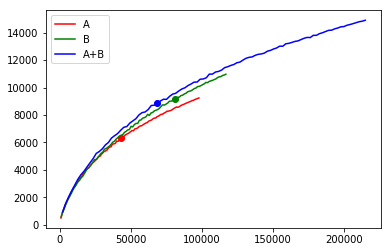

(M_z, N_z) = (43037, 6293)
(M_z, N_z) = (81138, 9186)
(M_z, N_z) = (68547, 8882)
A+B, theory: [63764.  7867.]


In [13]:
# venn diagram of types
A = set(corpusA.types)
B = set(corpusB.types)
print("|A| =", len(A))
print("|B| =", len(B))
print("|A ∪ B| =", len(A.union(B)))
print("|A ∩ B| =", len(A.intersection(B)))

# vectorize
A_  = np.array([ corpusA.M_z, corpusA.N_z ])
B_  = np.array([ corpusB.M_z, corpusB.N_z ])
AB_ = np.array([ corpusAB.M_z, corpusAB.N_z ])

# plot C=A+B
plt.plot(corpusA.TTR.m_tokens, corpusA.TTR.n_types, color = "r", label = "A")
plt.plot(corpusB.TTR.m_tokens, corpusB.TTR.n_types, color = "g", label = "B")
plt.plot(corpusAB.TTR.m_tokens, corpusAB.TTR.n_types, color = "b", label = "A+B")
plt.scatter([corpusA.M_z], [corpusA.N_z], color = "r")
plt.scatter([corpusB.M_z], [corpusB.N_z], color = "g")
plt.scatter([corpusAB.M_z], [corpusAB.N_z], color = "b")
plt.legend()
plt.show()

# combine
for corpus in [ corpusA, corpusB, corpusAB ]:
    print("(M_z, N_z) =", (corpus.M_z, corpus.N_z))
    
AB_theory = np.round((corpusA.M * A_ + corpusB.M * B_) / corpusAB.M)
print("A+B, theory:", AB_theory)

In [31]:
print("A:", (corpusA.M_z, corpusA.N_z))
print("B:", (corpusB.M_z, corpusB.N_z))
print("A+B:", (corpusAB.M_z, corpusAB.N_z))

A: (43037, 6293)
B: (81138, 9186)
A+B: (68547, 8882)


## Halve the Corpus

In talking about an "optimum" sample size there is an implicit assumption that this is fixed. Yet the optimum values of $M_z, N_z$ clearly fall on a curve of some kind proportional to $M, N$. That is, a smaller corpus has a _relatively_ bigger optimum and a bigger corpus has a _relatively_ smaller one. Some mechanism is exerting "pressure" on $M, N$ _toward_ an optimum but it doesn't converge on a single point. That different _books_ would map map to their optima according to some pattern would be too noisy. Rather, we need to construct mini-corpi from the corpus in question to eliminate book-to-book variations as a factor.

Take the corpus, cut it in half, and refit the half-corpus. We hypothesized that $M_z', N_z'$ would be unchanged. After all, if that's the "optimum" for the whole corpus, it ought to be _the_ optimum. That's not the case. By _halving_ the corpus, we found $M_z', N_z'$ to _increase_ by roughly $5.5\%, 3\%$, respectively, with bootstrapping error bounds ruling out a fluke. So we changed the arbitrary "one half" to a uniform random variable between $[0.2, 0.8]$ and found the following strange relation.

In [42]:
# take a single book and cut it by 1/n. The values for (M',N') are predictable via the TTR curve, but what about (M_z', N_z')?
df = []
corpus = corpi["2701"]
for _ in range(999):
    half = int(np.random.uniform(0.2, 0.8) * corpus.M)
    halftokens = np.random.choice(corpus.tokens, half, replace = False)
    halfcorpus = Corpus(halftokens, verbose = False)
    halfcorpus.buildTTRCurve()
    halfcorpus.fit(optimize = True)
#     print("Whole:", (corpus.M_z, corpus.N_z))
#     print("Half:", (halfcorpus.M_z, halfcorpus.N_z))
    df.append((half, halfcorpus.M_z, halfcorpus.N_z))

df = pd.DataFrame(df, columns = ["x", "M_z", "N_z"])
df.sort_values("x", inplace = True)
df["M_z_"] = df.M_z / corpus.M_z
df["N_z_"] = df.N_z / corpus.N_z
df["x_"] = df.x / corpus.M
df

Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TT

Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TT

Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TT

Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TT

Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TT

Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TT

Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TT

Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TT

Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TT

Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TT

Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TT

Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Type-Token Relation data accessible as <corpus>.TT

,x,M_z,N_z,M_z_,N_z_,x_
801,42108,131109,13320,1.150614,1.084161,0.200268
91,42223,136414,13649,1.197171,1.110939,0.200815
74,42440,124997,12952,1.096975,1.054208,0.201847
167,42509,127939,13184,1.122794,1.073091,0.202175
601,42560,130893,13349,1.148718,1.086521,0.202418
190,42606,134763,13697,1.182681,1.114846,0.202637
4,42720,130310,13294,1.143602,1.082045,0.203179
591,42736,138550,13806,1.215916,1.123718,0.203255
7,42867,130402,13388,1.144409,1.089696,0.203878
298,42925,130133,13285,1.142048,1.081312,0.204154


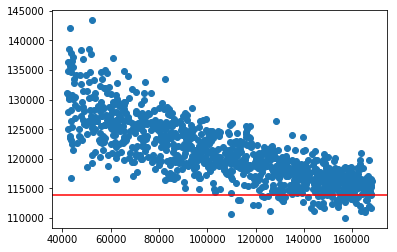

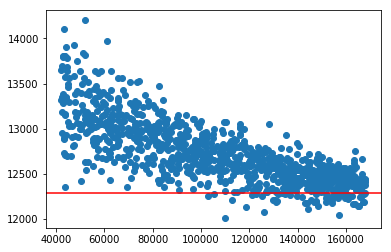

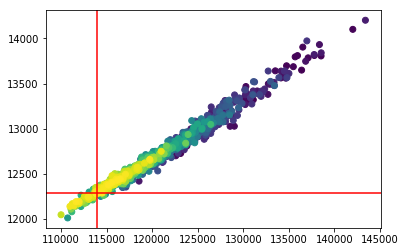

In [59]:
# OptimalFractions_df = df
df = OptimalFractions_df
plt.scatter(df.x, df.M_z)
plt.axhline(y = corpus.M_z, color = "red")
plt.show()
plt.scatter(df.x, df.N_z)
plt.axhline(y = corpus.N_z, color = "red")
plt.show()
plt.scatter(df.M_z, df.N_z, c = df.x)
plt.axvline(x = corpus.M_z, color = "red")
plt.axhline(y = corpus.N_z, color = "red")
plt.show()

M_z'/M_z = 1.0573595388068229 +/- 0.025023938831764705
N_z'/N_z = 1.032978058037818 +/- 0.016076031342846797


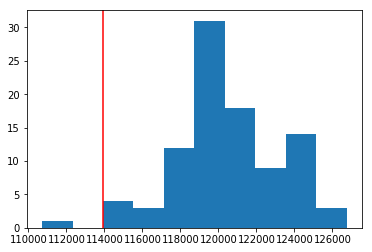

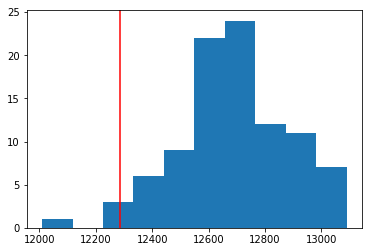

In [60]:
df = OptimalFractions_df
df = df[df.x_ > 0.47]
df = df[df.x_ < 0.53]
print("M_z'/M_z = %s +/- %s" % ((df.M_z / corpus.M_z).mean(), (df.M_z / corpus.M_z).std()))
print("N_z'/N_z = %s +/- %s" % ((df.N_z / corpus.N_z).mean(), (df.N_z / corpus.N_z).std()))

plt.hist(df.M_z); plt.axvline(x = corpus.M_z, color = "red"); plt.show()
plt.hist(df.N_z); plt.axvline(x = corpus.N_z, color = "red"); plt.show()

## What does it mean?

We are at a total loss to explain, or even describe this. Clearly, the optimum sample size varies as a function of the _absolute_ sample size, in total contradiction to the notion of $M_z, N_z$ being model parameters at all. They are parameters _at this sample size_, but drift when over- or under-sampling.

Hypothesis: The estimate $E(\frac{1}{2}M) = N_z\frac{\ln(1/2)}{4}$ includes some probability of drawing _every_ hapax into the sample. However, once we've _taken_ the sample and start sampling from the _sample_, the chance of drawing some hapax from the _original_ corpus _not_ drawn by the first sample is zero. We can show this visually as follows. _Partition_ the corpus into halves. Plot the TTR curve of each and notice that the two values of $M_z', N_z'$ are roughly the same, but that each sub-TTR curve is higher than the composite.

Number of tokens (<corpus>.M): 105129
Number of types  (<corpus>.N): 11923
Legomena vector  (<corpus>.k): [   0 6103 1961 1026  602  408  273  216  149]
Frequency distribution accessible as <corpus>.fdist
Number of tokens (<corpus>.M): 105129
Number of types  (<corpus>.N): 11764
Legomena vector  (<corpus>.k): [   0 5896 2038  986  598  397  312  194  154]
Frequency distribution accessible as <corpus>.fdist
Type-Token Relation data accessible as <corpus>.TTR
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Log model accessible as <corpus>.M_z, .N_z


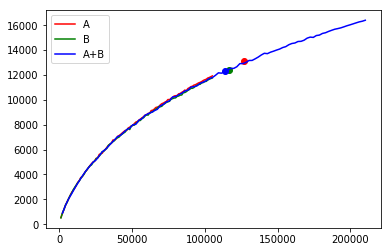

In [147]:
# partition the corpus
half = int(corpus.M/2)
tokens = np.random.permutation(corpus.tokens)
tokensA = tokens[:half]
tokensB = tokens[half:]
corpusA = Corpus(tokensA)
corpusB = Corpus(tokensB)

# fit each half-corpus
corpusA.buildTTRCurve()
corpusB.buildTTRCurve()
corpusA.fit(optimize = True)
corpusB.fit(optimize = True)

# plot C=A+B
plt.plot(corpusA.TTR.m_tokens, corpusA.TTR.n_types, color = "r", label = "A")
plt.plot(corpusB.TTR.m_tokens, corpusB.TTR.n_types, color = "g", label = "B")
plt.plot(corpus.TTR.m_tokens,  corpus.TTR.n_types,  color = "b", label = "A+B")
plt.scatter([corpusA.M_z], [corpusA.N_z], color = "r")
plt.scatter([corpusB.M_z], [corpusB.N_z], color = "g")
plt.scatter([corpus.M_z],  [corpus.N_z],  color = "b")
plt.legend()
plt.show()

Number of tokens (<corpus>.M): 70086
Number of types  (<corpus>.N): 9602
Legomena vector  (<corpus>.k): [   0 5218 1608  755  485  314  201  116   86]
Frequency distribution accessible as <corpus>.fdist
Number of tokens (<corpus>.M): 70086
Number of types  (<corpus>.N): 9512
Legomena vector  (<corpus>.k): [   0 5125 1588  752  495  280  210  147  100]
Frequency distribution accessible as <corpus>.fdist
Number of tokens (<corpus>.M): 70086
Number of types  (<corpus>.N): 9600
Legomena vector  (<corpus>.k): [   0 5234 1606  778  461  288  189  131  107]
Frequency distribution accessible as <corpus>.fdist
Type-Token Relation data accessible as <corpus>.TTR
Type-Token Relation data accessible as <corpus>.TTR
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Log model accessible as <corpus>.M_z, .N_z
Log model accessible as <corpus>.M_z, .N_z


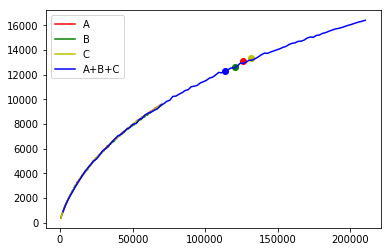

In [104]:
# partition the corpus
third = int(corpus.M/3)
tokens = np.random.permutation(corpus.tokens)
tokensA = tokens[:third]
tokensB = tokens[third:2*third]
tokensC = tokens[2*third:]
corpusA = Corpus(tokensA)
corpusB = Corpus(tokensB)
corpusC = Corpus(tokensC)

# fit each half-corpus
corpusA.buildTTRCurve()
corpusB.buildTTRCurve()
corpusC.buildTTRCurve()
corpusA.fit(optimize = True)
corpusB.fit(optimize = True)
corpusC.fit(optimize = True)

# plot C=A+B
plt.plot(corpusA.TTR.m_tokens, corpusA.TTR.n_types, color = "r", label = "A")
plt.plot(corpusB.TTR.m_tokens, corpusB.TTR.n_types, color = "g", label = "B")
plt.plot(corpusC.TTR.m_tokens, corpusC.TTR.n_types, color = "y", label = "C")
plt.plot(corpus.TTR.m_tokens,  corpus.TTR.n_types,  color = "b", label = "A+B+C")
plt.scatter([corpusA.M_z], [corpusA.N_z], color = "r")
plt.scatter([corpusB.M_z], [corpusB.N_z], color = "g")
plt.scatter([corpusC.M_z], [corpusC.N_z], color = "y")
plt.scatter([corpus.M_z],  [corpus.N_z],  color = "b")
plt.legend()
plt.show()

## Quick Note

Note, $M_z', N_z' > M_z, N_z$ in every case, despite the variance in the optimum found. Just for fun, if halving a corpus increases the optimum, does _doubling_ the corpus _decrease_ it?

Well... Of course not!!! For the same reason that halving a corpus, then doubling _that half_ doesn't get you back the original. In fact, it's easy to see that by doubling $M$ but keeping $N$ fixed, the whole nature of the curve changes. Our log model won't even fit the resulting data. This implies that doubling the size of a corpus without adding new words _breaks the model_. There's quite a bold hypothesis possible here: _Given that normal text exhibits a normal range of entropy, there exists a theoretical lower bound_. This is a slightly stronger statement than _vocabulary will never reach saturation, there will always be new words_.

Number of tokens (<corpus>.M): 420516
Number of types  (<corpus>.N): 16402
Legomena vector  (<corpus>.k): [   0    0 7197    0 2781    0 1555    0  872]
Frequency distribution accessible as <corpus>.fdist
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z


/home/victor/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 400.
  warnings.warn(msg, RuntimeWarning)
/home/victor/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


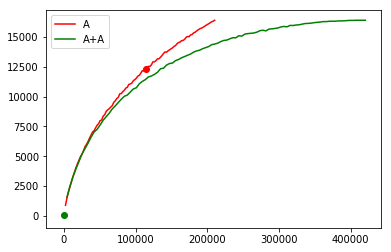

In [101]:
# just for fun, double the corpus
corpus2 = Corpus(corpus.tokens * 2)
corpus2.buildTTRCurve()
corpus2.fit(optimize = True)

# plot
plt.plot(corpus.TTR.m_tokens, corpus.TTR.n_types, color = "r", label = "A")
plt.plot(corpus2.TTR.m_tokens, corpus2.TTR.n_types, color = "g", label = "A+A")
plt.scatter([corpus.M_z], [corpus.N_z], color = "r")
plt.scatter([corpus2.M_z], [corpus2.N_z], color = "g")
plt.legend()
plt.show()

Number of tokens (<corpus>.M): 105129
Number of types  (<corpus>.N): 11871
Legomena vector  (<corpus>.k): [   0 5961 2045 1033  606  389  289  231  163]
Frequency distribution accessible as <corpus>.fdist
Number of tokens (<corpus>.M): 105129
Number of types  (<corpus>.N): 11809
Legomena vector  (<corpus>.k): [   0 5959 2055  954  565  425  293  183  196]
Frequency distribution accessible as <corpus>.fdist


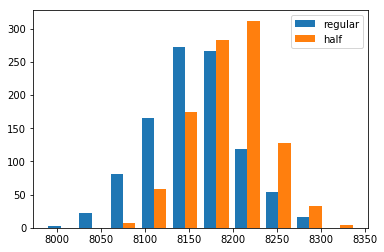

In [157]:
# partition the corpus
half = int(corpus.M/2)
tokens = np.random.permutation(corpus.tokens)
tokensA = tokens[:half]
tokensB = tokens[half:]
corpusA = Corpus(tokensA)
corpusB = Corpus(tokensB)
# corpusA.buildTTRCurve()
# corpusB.buildTTRCurve()
# corpusA.fit()
# corpusB.fit()

# # adjust k_0 (tokens not sampled) in each half
# corpusA.k[0] = len(set(corpusB.tokens) - set(corpusA.tokens))
# corpusB.k[0] = len(set(corpusA.tokens) - set(corpusB.tokens))
# print("kA =", corpusA.k)
# print("kB =", corpusB.k)
# assert sum(corpusA.k) == corpus.N
# assert sum(corpusB.k) == corpus.N

quarter = int(corpus.M/4)
# print("1/4 of M:", corpus.predict(quarter))
# print("1/2 of M':", corpusA.predict(quarter))

R, A = [], [] # regular, A
for _ in range(999):
    R.append(len(set(np.random.choice(corpus.tokens, quarter, replace = False))))
    A.append(len(set(np.random.choice(corpusA.tokens, quarter, replace = False))))
    
plt.hist([R, A], label = ["regular", "half"])
plt.legend()
plt.show()

210258 16402
105129 11871


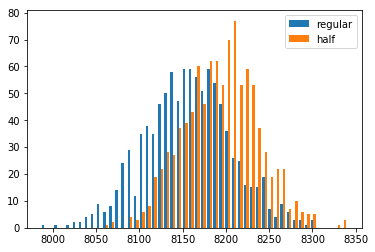

In [159]:
print(corpus.M, corpus.N)
print(corpusA.M, corpusA.N)

plt.hist([R, A], label = ["regular", "half"], bins = 50)
plt.legend()
plt.show()

Number of tokens (<corpus>.M): 113947
Number of types  (<corpus>.N): 12272
Legomena vector  (<corpus>.k): [   0 6119 2088 1037  616  426  313  230  161]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
M, N = (210258, 16402)
fit1 = (113947, 12286)
fit2 = (112068, 12170)


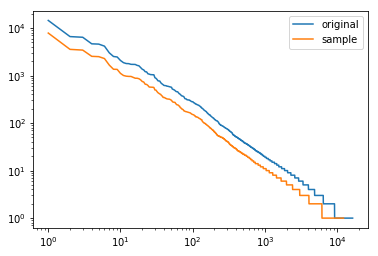

[0, 2, 6, 12, 20, 30, 42, 56, 72, 90]


/home/victor/.local/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


array([        inf,  1.98888707,  5.82854406, 11.73577628, 19.75649351,
       28.56807512, 38.88178914, 52.91304348, 75.59006211])

In [188]:
# optimum sample
tokens = np.random.choice(corpus.tokens, corpus.M_z, replace = False)
corpusO = Corpus(tokens)
corpusO.fit()
print("M, N =", (corpus.M, corpus.N))
print("fit1 =", (corpus.M_z, corpus.N_z))
print("fit2 =", (corpusO.M_z, corpusO.N_z))

plt.loglog(corpus.fdist["rank"], corpus.fdist.freq, label = "original")
plt.loglog(corpusO.fdist["rank"], corpusO.fdist.freq, label = "sample")
plt.legend()
plt.show()

print([n*(n+1) for n in range(10)])
corpusO.N_z / corpusO.k[:9]